✅ Citra 'citra_grayscale.png' Berhasil dimuat. Ukuran: (1024, 1024)


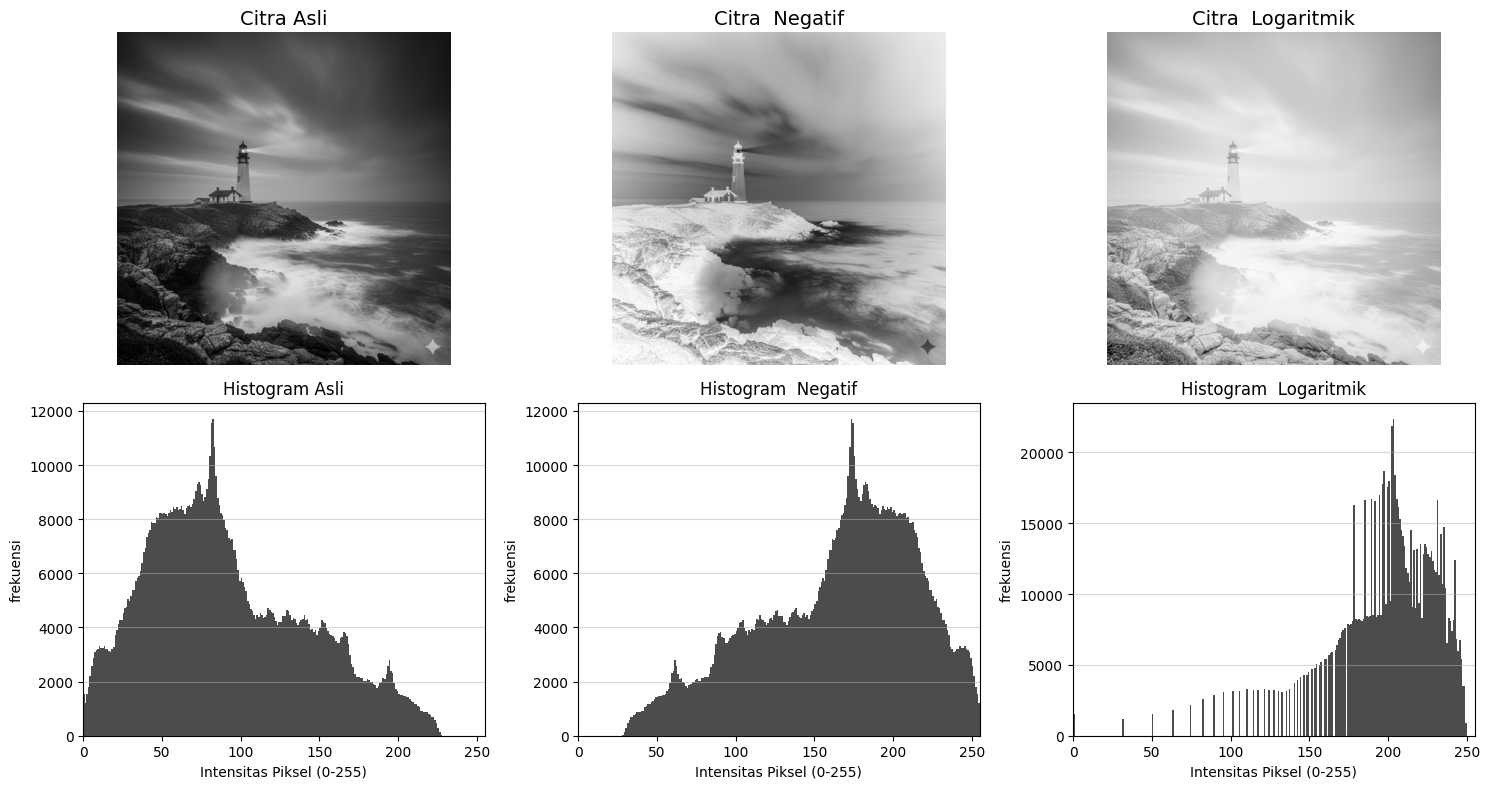

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Fungsi untuk Membaca Citra dan Error Handling
def read_image_grayscale(file_path):
    """Membaca citra dan memastikan citra dalam format grayscale """
    #Baca citra dalam mode grayscale
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    # Cek apakah citra berhasil dibuat
    if img is None:
        print(f"🛑 ERROR: File citra tidak ditemukan di jalur: {file_path}")
        print("Membuat citra dummy grayscale (300x300, 0-155) Sebagai gantinya.")
        # Membuat citra dummy (array Numpy 300x300)
        img = np.random.randint(0, 156, (300,300), dtype=np.uint8)
    else:
        print(f"✅ Citra '{file_path}' Berhasil dimuat. Ukuran: {img.shape}")

    
    return img

# 2. Fungsi untuk Transformasi Citra 
def transform_negatif(img):
    """ Menerapkan transformasi Negatif: G = 255 - f."""
    # Negatif (inversi): G = 255 - f. np.uint8 memastikan hasil tetap dalam 0-255.
    img_negatif = 255 - img
    return img_negatif

def transform_logaritmatik(img):
    """
    Meneratpkan  transformasi Logaritmatik: G = c * log(1 + F).
    konstanta c = 255 / log(1 + max(F)).
    """
    # Pastikan citra adalah float sebelum logaritma
    img_float = img.astype(np.float32)

    # Menghitung nilai piksel maksimum (max(F))
    max_f = np.max(img_float)
    # Menghitung konstanta c. Menggunakan np.og (logaritma natural)
    # Menambahkan epsilion (1e-6) untuk menghindari pembagian dengan nol jika max_f=0

    if max_f == 0:
        c = 255.0
    else:
        c = 255.0 / np.log(1 + max_f)
    # Menerapkan rumus logaritmatik
    img_log = c * np.log(1 + img_float)

    # normalisasi dan Konversi kembali ke tipe data integer 8- bit (0-255)
    img_log = np.clip(img_log, 0, 255)
    img_log = img_log.astype(np.uint8)

    return img_log

# 3. Fungsi untuk menampilkan citra dan Histrohram 

def display_results(images_and_titles):
    """ Menampilkan citra  dan histogramnya dalam satu plot """
    # Hitung jumlah total plot: 2 bariss (citra dan histogram) * njumlah citra
    num_images = len(images_and_titles)
    fig, axes = plt.subplots(2, num_images, figsize=(5 * num_images, 8))

    # Pastikan axes adalah array 2D
    if num_images == 1:
        axes = np.array([axes]).T

    for i, (img, title) in enumerate(images_and_titles):
        # ---- Tampilkan Citra (BARIS 1) ----
        ax_img = axes[0,i]
        ax_img.imshow(img, cmap='gray')
        ax_img.set_title(f'Citra {title}', fontsize=14)
        ax_img.axis('off')

        # ---- Tampilkan Histogram (Baris 2)----
        ax_hist = axes[1, i]

        # Hitung histogram menggunakan Mato=plotlib
        ax_hist.hist(img.ravel(), bins=256, range=[0,256], color='black', alpha=0.7)

        ax_hist.set_title(f'Histogram {title}', fontsize=12)
        ax_hist.set_xlabel('Intensitas Piksel (0-255)')
        ax_hist.set_ylabel('frekuensi')
        ax_hist.set_xlim([0,255])
        ax_hist.grid(axis='y', alpha = 0.5)

        plt.tight_layout()
plt.show()

#--- PROGRAM UTAMA ---

IMAGE_PATH = 'citra_grayscale.png'

# baca citra asli 
img_original = read_image_grayscale(IMAGE_PATH)

#Hanya lakukan transformasi jika citra berhasil dimuat (bukan citra kosong)
if img_original is not None:
    # Terapkan transformasi logarimatik
    img_negatif = transform_negatif(img_original)

    # Terapkan Transformasi logaritmatik
    img_logaritmik = transform_logaritmik(img_original)

    #siapkan data untuk ditampilkan 
    img_and_titles = [
    (img_original, 'Asli'),
    (img_negatif, ' Negatif'),
    (img_logaritmik, ' Logaritmik')
     ]
    # 5. Tampilkan Hasil
    display_results(img_and_titles)

In [2]:
!git commit -m "Data asli negatif,logaritmik "

[main f6a993d] Data asli negatif,logaritmik
 5 files changed, 236 insertions(+), 23 deletions(-)
 rename .ipynb_checkpoints/{Untitled1-checkpoint.ipynb => Pertemuan 7 - UTS-checkpoint.ipynb} (100%)
 create mode 100644 .ipynb_checkpoints/citra_grayscale-checkpoint.png
 create mode 100644 Pertemuan 7 - UTS.ipynb
 delete mode 100644 Untitled1.ipynb
 create mode 100644 citra_grayscale.png


In [3]:
!git push origin main

To https://github.com/EsaAlliant2/Pengelohan-Citra-Digital.git
   b5b2af5..f6a993d  main -> main
